In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import anndata as an
import scipy
from scipy.sparse import csr_matrix
import sklearn
import gget
import scanpy.external as sce

sc.settings.verbosity = 3  

In [2]:
fpath = "/scratch/indikar_root/indikar1/cstansbu/HSC/scanpy/merged_scfib.h5ad"
adata = sc.read_h5ad(fpath)
sc.logging.print_memory_usage()
adata

Memory usage: current 5.88 GB, difference +5.88 GB


AnnData object with n_obs × n_vars = 16130 × 13579
    obs: 'cluster_str', 'dataset', 'pred_phase', 'leiden', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'new_cluster'
    var: 'n_cells', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cluster_str_colors', 'dataset_colors', 'hvg', 'log1p', 'neighbors', 'new_cluster', 'new_cluster_colors', 'pca', 'pred_phase_colors', 'umap'
    obsm: 'X_pca', 'X_scanorama', 'X_umap'
    varm: 'PCs'
    layers: 'combat', 'counts', 'log_norm', 'magic', 'norm'
    obsp: 'connectivities', 'distances'

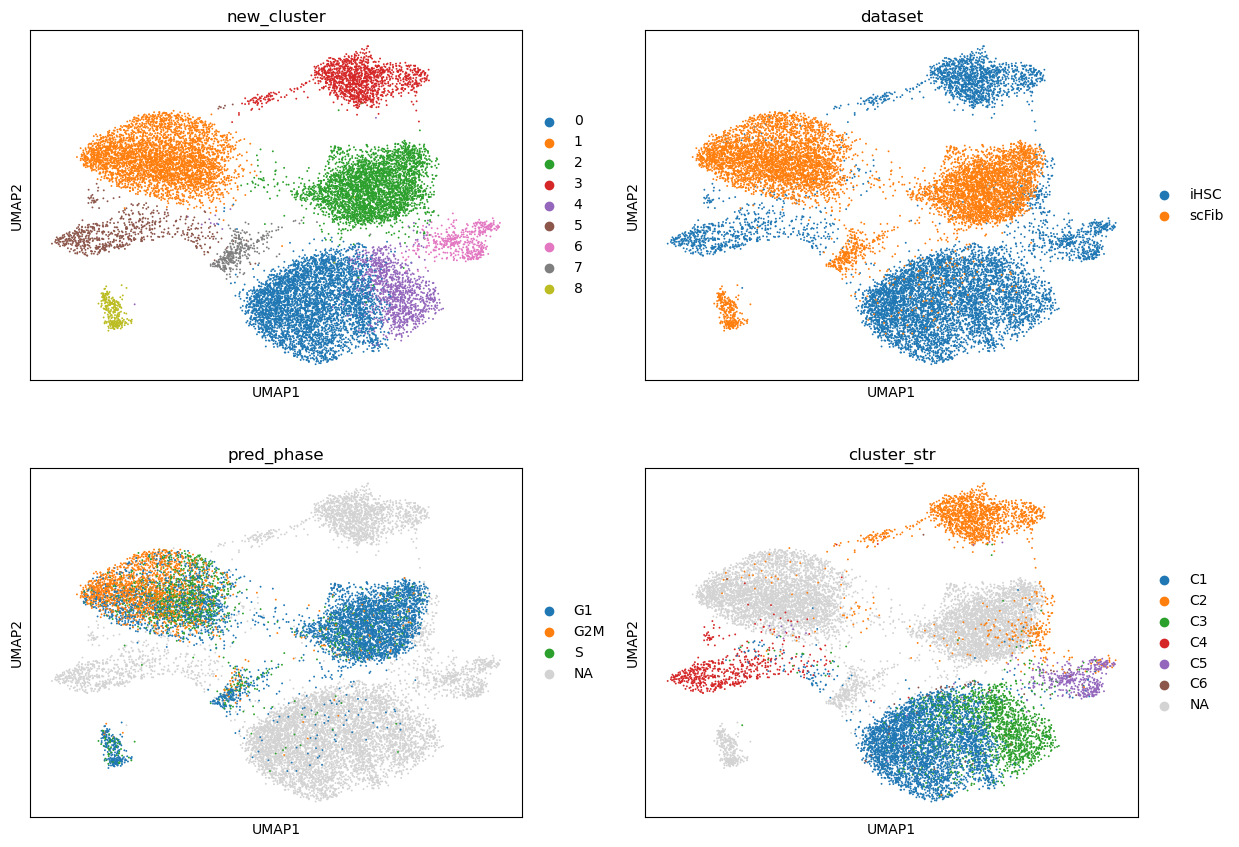

In [3]:
sc.pl.umap(
    adata,
    color=[
        'new_cluster', 
        'dataset',
        'pred_phase', 
        'cluster_str',
    ],
    ncols=2,
)

In [4]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:
sc.pl.umap(
    adata,
    color=[
        'CD34',
        'CD164',
    ],
    layer='combat',
    ncols=2,
)

In [ ]:
gene_list = [
    'CD34', 
    'GATA2',
    'STAT5A',
    'REL',
    'ACE',
]
layer = 'counts'
pdf = adata.obs.copy().reset_index()

for gene in gene_list:
    pdf[gene] = np.ravel(adata[:, gene].layers[layer].todense())
    
pdf = pd.melt(
    pdf,
    id_vars=['cell_id', 'dataset'],
    value_vars=gene_list
)

mask = pdf['value'] > 0

sns.boxplot(
    data=pdf[mask], 
    x='variable',
    y='value',
    hue='dataset',
    linecolor='k',
    width=0.4,
    dodge=True,
    showfliers=False,
)

In [ ]:
pdf['ACE'].max()

In [ ]:
break

In [ ]:
adata.layers['combat'][0, 0:5]

In [ ]:
adata.layers['log_norm'][0, 0:5].todense()

In [ ]:
?sc.pl.violin

In [ ]:
sc.pl.violin(
    adata, 
    keys=['CD34'],
    groupby='dataset',
)